# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [3]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',sep=',')

### Step 3. Assign it to a variable apple

In [5]:
apple = data

### Step 4.  Check out the type of the columns

In [6]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [49]:
apple["Date"]=pd.to_datetime(apple["Date"])

### Step 6.  Set the date as the index

In [50]:
apple.index = apple["Date"]

### Step 7.  Is there any duplicate dates?

In [51]:
apple.index.is_unique
# duplicate date가 없다

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [52]:
apple = apple.sort_index(axis=0,ascending = True)
apple

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
1980-12-12,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...,...
2014-07-01,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [66]:
m = pd.date_range(apple.Date.min(),apple.Date.max(),freq='BM')
m

DatetimeIndex(['1980-12-31', '1981-01-30', '1981-02-27', '1981-03-31',
               '1981-04-30', '1981-05-29', '1981-06-30', '1981-07-31',
               '1981-08-31', '1981-09-30',
               ...
               '2013-09-30', '2013-10-31', '2013-11-29', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-30', '2014-06-30'],
              dtype='datetime64[ns]', length=403, freq='BM')

### Step 10.  What is the difference in days between the first day and the oldest

In [54]:
apple.Date.max()-apple.Date.min()

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [67]:
# sol1
from datetime import datetime
months = apple["Date"].dt.strftime('%Y-%m')
print(len(set(months)))


404


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 972x648 with 0 Axes>

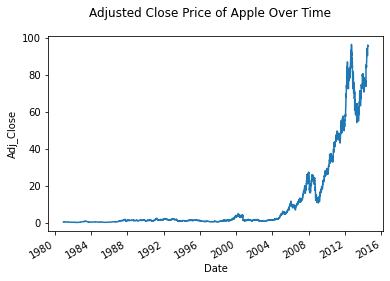

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13.5, 9))
fig, ax = plt.subplots()
ax = apple.iloc[:,-1].plot(ax=ax)
plt.ylabel("Adj_Close")
plt.suptitle("Adjusted Close Price of Apple Over Time")
plt.show